In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2023-10-19 19:07:35.508511: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 19:07:35.559526: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-19 19:07:35.559556: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-19 19:07:35.559594: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-19 19:07:35.569000: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 19:07:35.570143: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

5
(60000, 28, 28)


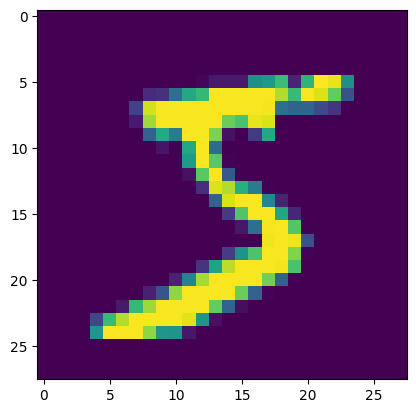

In [2]:
# 数据加载以及处理

(trainX, trainY), (testX, testY) = keras.datasets.mnist.load_data()
trainX, testX = trainX / 255, testX / 255

plt.imshow(trainX[0])
print(trainY[0])

print(trainX.shape)

In [3]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(),

    keras.layers.Dense(128),

    keras.layers.LeakyReLU(),

    keras.layers.Dropout(0.3),

    keras.layers.Dense(64),

    keras.layers.LeakyReLU(),

    keras.layers.Dropout(0.3),

    keras.layers.Dense(32),

    keras.layers.Dense(10, activation = 'softmax')
])

In [4]:
model.compile(optimizer = keras.optimizers.Adam(0.03), loss = keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(trainX, trainY, batch_size = 64, epochs = 5)

Epoch 1/5


2023-10-19 19:07:39.512504: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


938/938 [==============================] - 4s 3ms/step - loss: 4.1179 - accuracy: 0.7486
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4911 - accuracy: 0.8679
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4829 - accuracy: 0.8737
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 40.7002 - accuracy: 0.7893
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 1.5433 - accuracy: 0.8286


In [5]:
from pandas import DataFrame

model.save('../SavedModel/MNIST/BPModel1.h5')

acc = np.array(history.history['accuracy'])
los = np.array(history.history['loss'])

df = DataFrame(data = {'loss' : los, 'accuracy' : acc})
df.to_csv('../SavedModel/MNIST/BPLoss1.csv', index = False)

/home/machillka/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


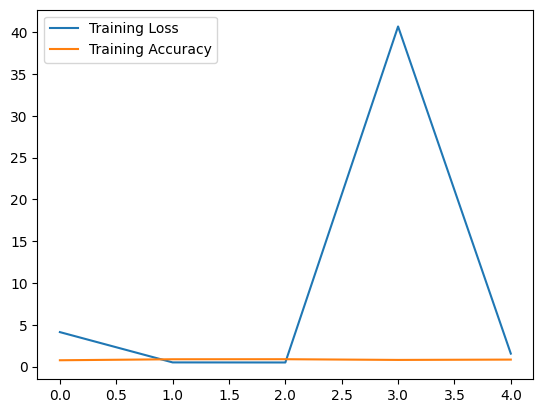

In [6]:
# 绘制 Loss 图像
plt.plot(los, label = 'Training Loss')
plt.plot(acc, label = 'Training Accuracy')
plt.legend()
plt.show()